<a href="https://colab.research.google.com/github/pumkinni/book_study/blob/master/%ED%98%BC%EA%B3%B5_%EB%A8%B8_%EB%94%A5_4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 로지스틱 회귀(분류 모델)
> 로지스틱 회귀 알고리즘을 배우고 이진 분류 문제에서 클래스 확률을 예측

> 소프트맥스 함수(여러개의 선형 방정식의 출력 값을 0~1사이로 압축하고 전체 합이 1이 되도록 만듬)

- 이진분류
> 하나의 선형 방정식을 훈련 후 출력값을 **시그모이드 함수**에 통과시켜 0~1 사이의 값을 만듬

- 다중분류
> 클래스 개수만큼 방정식을 훈련 후 출력 값을 **소프트맥스 함수**를 통과시켜 전체 클래스에 대한 합이 항상 1이 되로록 만듬(각 클래스에 대한 확률)

In [ ]:
# 데이터 정리
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [ ]:
# 타겟 데이터 확인
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [ ]:
# 입력 데이터
fish_input = fish[['Weight',	'Length',	 'Diagonal', 	'Height', 	'Width']].to_numpy()

In [ ]:
fish_input[:5]

array([[242.    ,  25.4   ,  30.    ,  11.52  ,   4.02  ],
       [290.    ,  26.3   ,  31.2   ,  12.48  ,   4.3056],
       [340.    ,  26.5   ,  31.1   ,  12.3778,   4.6961],
       [363.    ,  29.    ,  33.5   ,  12.73  ,   4.4555],
       [430.    ,  29.    ,  34.    ,  12.444 ,   5.134 ]])

In [ ]:
# 타겟 데이터
fish_target = fish['Species'].to_numpy()

In [ ]:
# 테스트 데이터와 훈련 데이터 구분
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state = 42)
train_input.shape, test_input.shape, train_target.shape, test_target.shape

((119, 5), (40, 5), (119,), (40,))

In [ ]:
# 표준화 전처리
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

k-최근접 이윳 분류기의 확률 예측

In [ ]:
# k-최근접 이웃 분류기로 훈련 후 정확도 확인
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors = 3)
kn.fit(train_scaled, train_target)
kn.score(train_scaled, train_target), kn.score(test_scaled, test_target)

(0.8907563025210085, 0.85)

In [ ]:
# 각 클래스에 대한 확률 확인
import numpy as np
proba = kn.predict_proba(test_scaled[:5])
np.round(proba, decimals = 4)# 소숫점 4번째 자리까지 표기

array([[0.    , 0.    , 1.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 1.    , 0.    ],
       [0.    , 0.    , 0.    , 1.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.6667, 0.    , 0.3333, 0.    , 0.    ],
       [0.    , 0.    , 0.6667, 0.    , 0.3333, 0.    , 0.    ]])

In [ ]:
distance, indexes = kn.kneighbors(test_scaled[3:4])
train_target[indexes]

array([['Roach', 'Perch', 'Perch']], dtype=object)

### 로지스틱 회귀
> 이름은 회귀이지만 분류모델

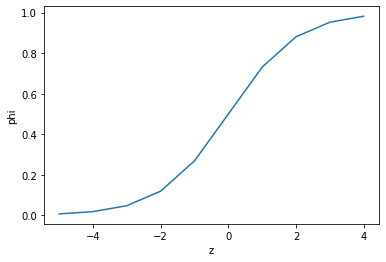

In [ ]:
# 시그모이드 함수 만들기
import numpy as np
import matplotlib.pyplot as plt
z = np.arange(-5, 5)
phi = 1 / (1 + np.exp(-z))
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

로지스틱 회귀로 이진 분류 진행하기

In [ ]:
# 도미와 빙어에 대한 데이터만 추출
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]
train_bream_smelt.shape, target_bream_smelt.shape

((33, 5), (33,))

In [ ]:
# 로지스틱 회귀를 사용하여 훈련
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [ ]:
# 5개의 훈련 값 예측
lr.predict(train_bream_smelt[:5])

array(['Bream', 'Smelt', 'Bream', 'Bream', 'Bream'], dtype=object)

In [ ]:
# 5개의 샘플 예측확률 출력
lr.predict_proba(train_bream_smelt[:5])

array([[0.99759855, 0.00240145],
       [0.02735183, 0.97264817],
       [0.99486072, 0.00513928],
       [0.98584202, 0.01415798],
       [0.99767269, 0.00232731]])

In [ ]:
# 클래스 순서 확인
lr.classes_

array(['Bream', 'Smelt'], dtype=object)

In [ ]:
# 계수확인
lr.coef_, lr.intercept_

(array([[-0.4037798 , -0.57620209, -0.66280298, -1.01290277, -0.73168947]]),
 array([-2.16155132]))

In [ ]:
# z값 구하기
decisions = lr.decision_function(train_bream_smelt[:5])

In [ ]:
# 시그모이드 함수(expit())
# predict_proba()를 통해 얻은 1열의 값과 같음
from scipy.special import expit
expit(decisions)

array([0.00240145, 0.97264817, 0.00513928, 0.01415798, 0.00232731])

로지스틱 회귀로 다중 분류 수행하기

In [ ]:
# 로지스틱 회귀로 훈련 후 정확도 확인
lr = LogisticRegression(C = 20, max_iter = 1000) # 규제를 제어하는 매개변수C (작을수록 규제가 커짐 / 기본값은 1)
lr.fit(train_scaled, train_target)
lr.score(train_scaled, train_target), lr.score(test_scaled, test_target)

(0.9327731092436975, 0.925)

In [ ]:
# 5개 테스트 샘플의 정답 예측
lr.predict(test_scaled[:5])

array(['Perch', 'Smelt', 'Pike', 'Roach', 'Perch'], dtype=object)

In [ ]:
# 5개 샘플의 예측확률 추출
proba = lr.predict_proba(test_scaled[:5])
np.round(proba, decimals = 3)

array([[0.   , 0.014, 0.841, 0.   , 0.136, 0.007, 0.003],
       [0.   , 0.003, 0.044, 0.   , 0.007, 0.946, 0.   ],
       [0.   , 0.   , 0.034, 0.935, 0.015, 0.016, 0.   ],
       [0.011, 0.034, 0.306, 0.007, 0.567, 0.   , 0.076],
       [0.   , 0.   , 0.904, 0.002, 0.089, 0.002, 0.001]])

In [ ]:
lr.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [ ]:
# 5개의 특성과 7개의 클래스(클래스 마다 z값을 계산 = 7개의 z값)
lr.coef_.shape, lr.intercept_.shape

((7, 5), (7,))

소프트맥스 함수(여러개의 선형 방정식의 출력 값을 0~1사이로 압축하고 전체 합이 1이 되도록 만듬)

In [ ]:
# z1 ~ z7까지 구한 후 소프트맥스 함수를 이용하여 확률로 바꾸어 보기
decision = lr.decision_function(test_scaled[:5])
np.round(decision, decimals = 2)

array([[ -6.5 ,   1.03,   5.16,  -2.73,   3.34,   0.33,  -0.63],
       [-10.86,   1.93,   4.77,  -2.4 ,   2.98,   7.84,  -4.26],
       [ -4.34,  -6.23,   3.17,   6.49,   2.36,   2.42,  -3.87],
       [ -0.68,   0.45,   2.65,  -1.19,   3.26,  -5.75,   1.26],
       [ -6.4 ,  -1.99,   5.82,  -0.11,   3.5 ,  -0.11,  -0.71]])

In [ ]:
from scipy.special import softmax
proba = softmax(decision, axis = 1)
np.round(proba, decimals = 3)

array([[0.   , 0.014, 0.841, 0.   , 0.136, 0.007, 0.003],
       [0.   , 0.003, 0.044, 0.   , 0.007, 0.946, 0.   ],
       [0.   , 0.   , 0.034, 0.935, 0.015, 0.016, 0.   ],
       [0.011, 0.034, 0.306, 0.007, 0.567, 0.   , 0.076],
       [0.   , 0.   , 0.904, 0.002, 0.089, 0.002, 0.001]])